In [ ]:
!pip install geopandas

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import xarray as xr
import numpy as np
import os
import json
import geopandas as gpd

## Inspecting the Monthly Data.

In [7]:
ds=xr.open_dataset("/content/drive/MyDrive/DS Project/Omdena X Valutus/temperature_rcp_45_monthly.nc")

In [8]:
ds

<xarray.Dataset>
Dimensions:    (y: 950, x: 1000, time: 396)
Coordinates:
    lon        (y, x) float32 ...
    lat        (y, x) float32 ...
    height     float64 ...
  * time       (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2050-12-31
Dimensions without coordinates: y, x
Data variables:
    tasAdjust  (time, y, x) float32 ...
Attributes: (12/30)
    CDI:                      Climate Data Interface version 1.9.6 (http://mp...
    Conventions:              CF-1.6
    CDO:                      Climate Data Operators version 1.9.6 (http://mp...
    creation_date:            2020-02-14T00:20:23ZCET+0100
    NCO:                      netCDF Operators version 4.7.7 (Homepage = http...
    acknowledgements:         This work was performed within Copernicus Clima...
    ...                       ...
    invar_rcm_model_driver:   ICHEC-EC-EARTH
    invar_experiment_id:      rcp45
    invar_realisation_id:     r12i1p1
    invar_rcm_model_id:       CLMcom-CCLM4-8-17
    time_period:              2018
    history:

## Sampling Monthly data to yearly and saving it back as NETCDF

In [10]:
ds_yearly=ds.resample(time="1Y").mean()

In [11]:
ds_yearly

<xarray.Dataset>
Dimensions:    (y: 950, x: 1000, time: 33)
Coordinates:
    lon        (y, x) float32 -8.229 -8.18 -8.131 -8.082 ... 73.83 73.88 73.94
    lat        (y, x) float32 27.8 27.81 27.82 27.83 ... 58.35 58.32 58.28 58.25
    height     float64 2.0
  * time       (time) datetime64[ns] 2018-12-31 2019-12-31 ... 2050-12-31
Dimensions without coordinates: y, x
Data variables:
    tasAdjust  (time, y, x) float32 295.3 295.3 295.4 295.4 ... nan nan nan nan
Attributes: (12/30)
    CDI:                      Climate Data Interface version 1.9.6 (http://mp...
    Conventions:              CF-1.6
    CDO:                      Climate Data Operators version 1.9.6 (http://mp...
    creation_date:            2020-02-14T00:20:23ZCET+0100
    NCO:                      netCDF Operators version 4.7.7 (Homepage = http...
    acknowledgements:         This work was performed within Copernicus Clima...
    ...                       ...
    invar_rcm_model_driver:   ICHEC-EC-EARTH
    invar_experiment_id:      rcp45
    invar_realisation_id:     r12i1p1
    invar_rcm_model_id:       CLMcom-CCLM4-8-17
    time_period:              2018
    history:

In [12]:
ds_yearly.to_dataframe()

lon        lat   tasAdjust  height
y   x   time                                                
0   0   2018-12-31  -8.229275  27.802845  295.297089     2.0
        2019-12-31  -8.229275  27.802845  295.454895     2.0
        2020-12-31  -8.229275  27.802845  295.267487     2.0
        2021-12-31  -8.229275  27.802845  295.725006     2.0
        2022-12-31  -8.229275  27.802845  295.457794     2.0
...                       ...        ...         ...     ...
949 999 2046-12-31  73.937675  58.246738         NaN     2.0
        2047-12-31  73.937675  58.246738         NaN     2.0
        2048-12-31  73.937675  58.246738         NaN     2.0
        2049-12-31  73.937675  58.246738         NaN     2.0
        2050-12-31  73.937675  58.246738         NaN     2.0

[31350000 rows x 4 columns]

## Removing data for dates/year before 2020.

In [25]:
ds_yearly.isel(time=slice(2, None))

<xarray.Dataset>
Dimensions:    (y: 950, x: 1000, time: 31)
Coordinates:
    lon        (y, x) float32 -8.229 -8.18 -8.131 -8.082 ... 73.83 73.88 73.94
    lat        (y, x) float32 27.8 27.81 27.82 27.83 ... 58.35 58.32 58.28 58.25
    height     float64 2.0
  * time       (time) datetime64[ns] 2020-12-31 2021-12-31 ... 2050-12-31
Dimensions without coordinates: y, x
Data variables:
    tasAdjust  (time, y, x) float32 295.3 295.3 295.4 295.4 ... nan nan nan nan
Attributes: (12/30)
    CDI:                      Climate Data Interface version 1.9.6 (http://mp...
    Conventions:              CF-1.6
    CDO:                      Climate Data Operators version 1.9.6 (http://mp...
    creation_date:            2020-02-14T00:20:23ZCET+0100
    NCO:                      netCDF Operators version 4.7.7 (Homepage = http...
    acknowledgements:         This work was performed within Copernicus Clima...
    ...                       ...
    invar_rcm_model_driver:   ICHEC-EC-EARTH
    invar_experiment_id:      rcp45
    invar_realisation_id:     r12i1p1
    invar_rcm_model_id:       CLMcom-CCLM4-8-17
    time_period:              2018
    history:

In [31]:
ds_yearly.isel(time=slice(2, None)).to_netcdf("/content/drive/MyDrive/DS Project/Omdena X Valutus/temp_yearly.nc")

In [32]:
ds_new= xr.open_dataset("/content/drive/MyDrive/DS Project/Omdena X Valutus/temp_yearly.nc")

In [33]:
ds_new

<xarray.Dataset>
Dimensions:    (y: 950, x: 1000, time: 31)
Coordinates:
    lon        (y, x) float32 ...
    lat        (y, x) float32 ...
  * time       (time) datetime64[ns] 2020-12-31 2021-12-31 ... 2050-12-31
    height     float64 ...
Dimensions without coordinates: y, x
Data variables:
    tasAdjust  (time, y, x) float32 ...
Attributes: (12/30)
    CDI:                      Climate Data Interface version 1.9.6 (http://mp...
    Conventions:              CF-1.6
    CDO:                      Climate Data Operators version 1.9.6 (http://mp...
    creation_date:            2020-02-14T00:20:23ZCET+0100
    NCO:                      netCDF Operators version 4.7.7 (Homepage = http...
    acknowledgements:         This work was performed within Copernicus Clima...
    ...                       ...
    invar_rcm_model_driver:   ICHEC-EC-EARTH
    invar_experiment_id:      rcp45
    invar_realisation_id:     r12i1p1
    invar_rcm_model_id:       CLMcom-CCLM4-8-17
    time_period:              2018
    history:

## High level Visualization for the data

In [18]:
import matplotlib.pyplot as plt

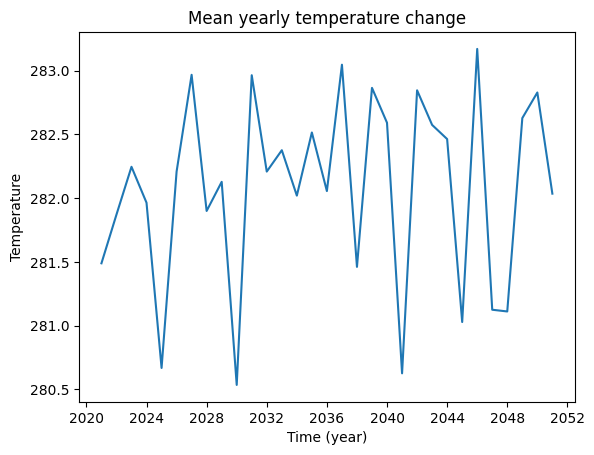

In [34]:
plt.figure()
plt.plot(ds_new['time'], ds_new['tasAdjust'][:, 500, 600] )
plt.xlabel("Time (year)")
plt.ylabel("Temperature")
plt.title("Mean yearly temperature change")
plt.show()

# ds_new['tasAdjust']

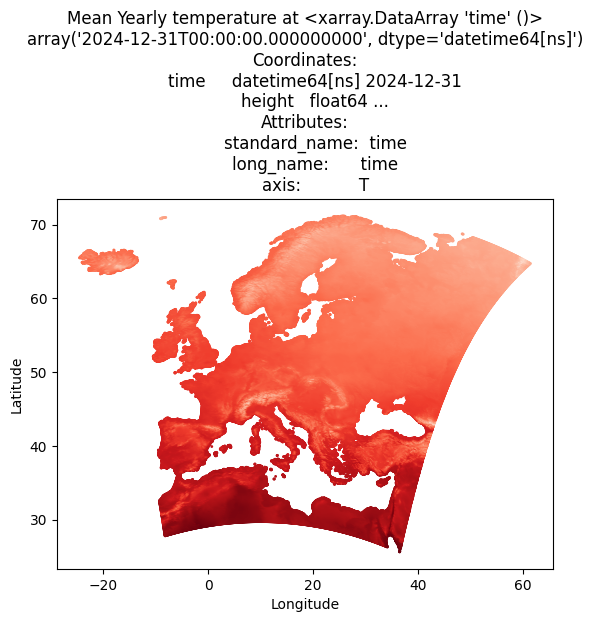

In [38]:
plt.figure()
plt.scatter(ds_new['lon'], ds_new['lat'], c=ds_new['tasAdjust'][4, :, :], cmap='Reds', s=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Mean Yearly temperature at {ds_new['time'][4]}")
plt.show()

## Performing same steps for the RCP 8.5 Data

In [39]:
ds_85=xr.open_dataset("/content/drive/MyDrive/DS Project/Omdena X Valutus/temperature_rcp_85_monthly.nc")

In [40]:
ds_yearly_85=ds_85.resample(time="1Y").mean()

In [41]:
ds_yearly_85

<xarray.Dataset>
Dimensions:    (y: 950, x: 1000, time: 33)
Coordinates:
    lon        (y, x) float32 -8.229 -8.18 -8.131 -8.082 ... 73.83 73.88 73.94
    lat        (y, x) float32 27.8 27.81 27.82 27.83 ... 58.35 58.32 58.28 58.25
    height     float64 2.0
  * time       (time) datetime64[ns] 2018-12-31 2019-12-31 ... 2050-12-31
Dimensions without coordinates: y, x
Data variables:
    tasAdjust  (time, y, x) float32 296.2 296.3 296.3 296.4 ... nan nan nan nan
Attributes: (12/30)
    CDI:                      Climate Data Interface version 1.9.6 (http://mp...
    Conventions:              CF-1.6
    CDO:                      Climate Data Operators version 1.9.6 (http://mp...
    creation_date:            2020-02-13T23:47:09ZCET+0100
    NCO:                      netCDF Operators version 4.7.7 (Homepage = http...
    acknowledgements:         This work was performed within Copernicus Clima...
    ...                       ...
    invar_rcm_model_driver:   ICHEC-EC-EARTH
    invar_experiment_id:      rcp85
    invar_realisation_id:     r12i1p1
    invar_rcm_model_id:       CLMcom-CCLM4-8-17
    time_period:              2018
    history:

In [42]:
ds_yearly_85.isel(time=slice(2, None)).to_netcdf("/content/drive/MyDrive/DS Project/Omdena X Valutus/temp_yearly_85.nc")